In [1]:
import pandas as pd
data=pd.read_csv("train.csv")

In [2]:
data.shape

(891, 12)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

# Setup Environment: PyCaret memiliki fungsi setup() yang secara otomatis akan mempersiapkan data Anda untuk pelatihan model
from pycaret.classification import setup
clf1 = setup(data=data, target='Survived', verbose=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


In [5]:
#Menampilkan Statistik Deskriptif
#Setelah setup(), Anda dapat melihat statistik deskriptif dari dataset untuk mendapatkan gambaran umum tentang data.

clf1.get_config('X').describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693428
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329224


6.4 Visualisasi Interaktif dengan eda()
PyCaret juga memiliki fungsi eda() yang menghasilkan laporan EDA interaktif menggunakan pandas-profiling atau Sweetviz.

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Train Multiple Models: PyCaret memungkinkan Anda melatih berbagai macam model machine learning hanya dengan satu baris kode.
from pycaret.classification import compare_models
best_model = compare_models()
     

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7975,0.8691,0.6697,0.7719,0.7132,0.5592,0.5654,1.2470
ridge,Ridge Classifier,0.7528,0.8647,0.4522,0.8257,0.5793,0.4273,0.4679,0.1270
et,Extra Trees Classifier,0.7400,0.7837,0.4774,0.7654,0.5815,0.4088,0.4356,0.2120
nb,Naive Bayes,0.6709,0.7925,0.1761,0.8582,0.2816,0.1808,0.2747,0.0880
knn,K Neighbors Classifier,0.6275,0.5906,0.3690,0.5175,0.4255,0.1654,0.1713,0.1310
lda,Linear Discriminant Analysis,0.6260,0.5382,0.0348,0.0800,0.0485,0.0335,0.0389,0.0940
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1010
rf,Random Forest Classifier,0.6164,0.7890,0.0000,0.0000,0.0000,0.0000,0.0000,0.2600
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0940
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1720


In [6]:
best_models = compare_models(n_select=10)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7975,0.8691,0.6697,0.7719,0.7132,0.5592,0.5654,0.2430
ridge,Ridge Classifier,0.7528,0.8647,0.4522,0.8257,0.5793,0.4273,0.4679,0.1160
et,Extra Trees Classifier,0.7400,0.7837,0.4774,0.7654,0.5815,0.4088,0.4356,0.2450
nb,Naive Bayes,0.6709,0.7925,0.1761,0.8582,0.2816,0.1808,0.2747,0.0900
knn,K Neighbors Classifier,0.6275,0.5906,0.3690,0.5175,0.4255,0.1654,0.1713,0.1150
lda,Linear Discriminant Analysis,0.6260,0.5382,0.0348,0.0800,0.0485,0.0335,0.0389,0.1070
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0900
rf,Random Forest Classifier,0.6164,0.7890,0.0000,0.0000,0.0000,0.0000,0.0000,0.2800
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1030
gbc,Gradient Boosting Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1570


In [7]:

# Select a Specific Model: Anda juga bisa melatih model tertentu, seperti Random Forest.
from pycaret.classification import create_model
lr_model = create_model('lr')

In [8]:
# Tune Model: PyCaret memiliki fungsi tune_model() yang secara otomatis mencari kombinasi hyperparameter terbaik untuk model Anda.
from pycaret.classification import tune_model
tuned_lr_model = tune_model(lr_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8536,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8254,0.8120,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.9206,0.9669,0.8333,0.9524,0.8889,0.8276,0.8321
3,0.8548,0.9075,0.6957,0.8889,0.7805,0.6744,0.6858
4,0.7258,0.8268,0.4583,0.7333,0.5641,0.3793,0.4016
5,0.7581,0.8300,0.6250,0.7143,0.6667,0.4781,0.4807
6,0.8387,0.8662,0.6250,0.9375,0.7500,0.6379,0.6664
7,0.8065,0.8596,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.7419,0.8575,0.5000,0.7500,0.6000,0.4206,0.4394


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
from pycaret.classification import pull

# Menune model
tuned_lr_model = tune_model(lr_model)

# Mengambil hasil
tuned_results = pull()
print(tuned_results)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
tuned_results


In [9]:
from pycaret.classification import evaluate_model

# Evaluasi model yang telah ditune
evaluate_model(tuned_lr_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

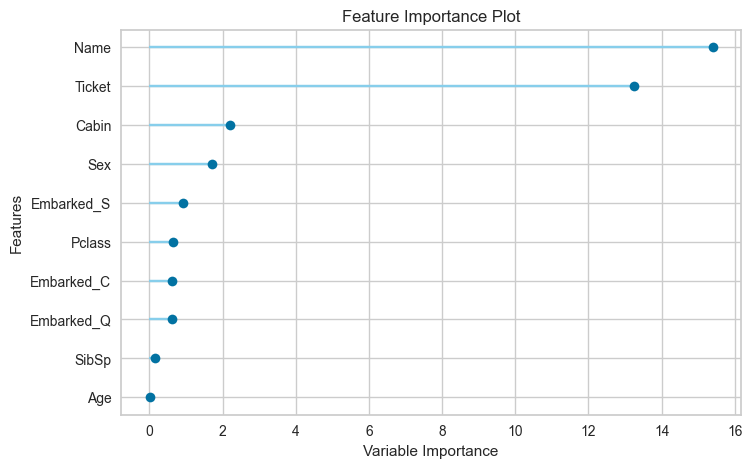

TypeError: This function only supports tree based models for binary classification: lightgbm, rf, et, dt.

In [44]:

# Plot Feature Importance: PyCaret memungkinkan Anda melihat fitur mana yang paling berpengaruh dalam model.
from pycaret.classification import plot_model
plot_model(tuned_lr_model, plot='feature')
     

# SHAP Analysis: PyCaret juga mendukung interpretasi model menggunakan SHAP (SHapley Additive exPlanations)
from pycaret.classification import interpret_model
interpret_model(tuned_lr_model)

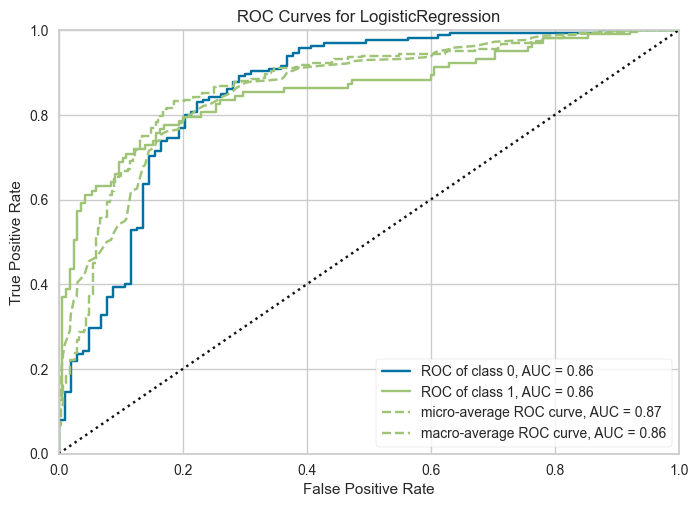

In [47]:
# Visualize Model Pelrormance: Anda bisa memvisualisasikan berbagai metrik kinerja model, seperti ROC curve, confusion matrix, dll.
plot_model(tuned_lr_model, plot='auc')


. Kurva ROC untuk Regresi Logistik
Apa yang Ditampilkan:

Kurva ROC (Receiver Operating Characteristic) menggambarkan kemampuan diagnostik dari klasifikasi biner seiring dengan perubahan ambang batas diskriminasinya.
Kurva ini memplot Tingkat Positif Benar (TPR, atau Sensitivitas) terhadap Tingkat Positif Palsu (FPR, atau 1 - Spesifisitas) untuk pengaturan ambang yang berbeda.
Setiap garis mewakili kurva ROC untuk satu kelas terhadap semua yang lain, atau rata-rata:
Garis biru: Kelas 0 (misalnya, tidak selamat)
Garis hijau: Kelas 1 (misalnya, selamat)
Garis putus-putus hijau muda: Kurva ROC mikro-rata
Garis putus-putus abu-abu: Kurva ROC makro-rata
Nilai AUC (Area Under the Curve) ditampilkan untuk setiap kurva, menunjukkan kemampuan model untuk membedakan antar kelas.
Interpretasi:

Nilai AUC yang mendekati 1.0 menunjukkan performa model yang sangat baik. Di sini, semua nilai AUC sekitar 0.86 hingga 0.87, menunjukkan performa prediktif yang kuat.

Mengapa Kurva ROC Penting?
Skor AUC: Di bawah kurva ROC ada sesuatu yang disebut AUC, atau Area Under the Curve. Ini seperti skor total Anda di permainan. Skor lebih tinggi (mendekati angka 1) berarti Anda sangat baik dalam menebak. Skor yang lebih rendah (mendekati angka 0) berarti Anda perlu berlatih lebih banyak.
Contoh Sederhana:
Misalkan Anda bermain tebak-tebakan sebanyak 10 kali. Jika Anda mendapat skor AUC 0.9, itu berarti Anda sangat hebat dalam menebak karena skor Anda hampir sempurna. Kurva ROC akan naik tinggi ke atas, menunjukkan bahwa Anda hampir selalu benar.

Bagaimana Menggambarkan Kurva ROC?
Garis Menanjak: Bayangkan sebuah garis yang naik dari sudut kiri bawah ke sudut kanan atas pada grafik. Semakin tinggi dan lebih cepat garis itu naik, semakin baik Anda dalam menebak.
Dengan menggambar banyak titik berdasarkan hasil tebakan Anda (berapa kali benar dan salah) dan menghubungkan titik-titik tersebut, kita mendapatkan kurva ROC. Ini membantu kita melihat dengan jelas kapan kita menebak dengan baik dan kapan kita perlu memperbaiki menebak kita.

Kesimpulan:
Jadi, kurva ROC seperti laporan nilai Anda di permainan tebak-tebakan, memberitahu seberapa baik Anda menebak antara ada atau tidak adanya mainan dalam kotak. Ini membantu kita mengetahui seberapa akurat tebakan kita dan apa yang bisa kita lakukan untuk menjadi lebih baik dalam menebak.

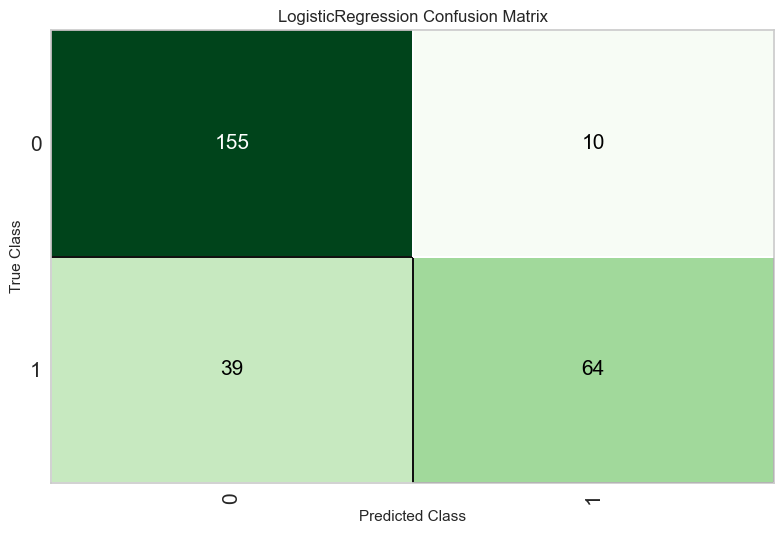

In [48]:
plot_model(tuned_lr_model, plot='confusion_matrix')
     


     

Matriks konfusi menunjukkan jumlah prediksi yang benar dan salah dibagi berdasarkan kelas aktual.
Matriksnya terstruktur sebagai berikut:
Kiri atas (Negatif Benar): 155 - Jumlah negatif aktual (0) yang diprediksi dengan benar sebagai negatif (0).
Kanan atas (Positif Palsu): 10 - Jumlah negatif aktual (0) yang salah diprediksi sebagai positif (1).
Kiri bawah (Negatif Palsu): 39 - Jumlah positif aktual (1) yang salah diprediksi sebagai negatif (0).
Kanan bawah (Positif Benar): 64 - Jumlah positif aktual (1) yang diprediksi dengan benar sebagai positif (1).

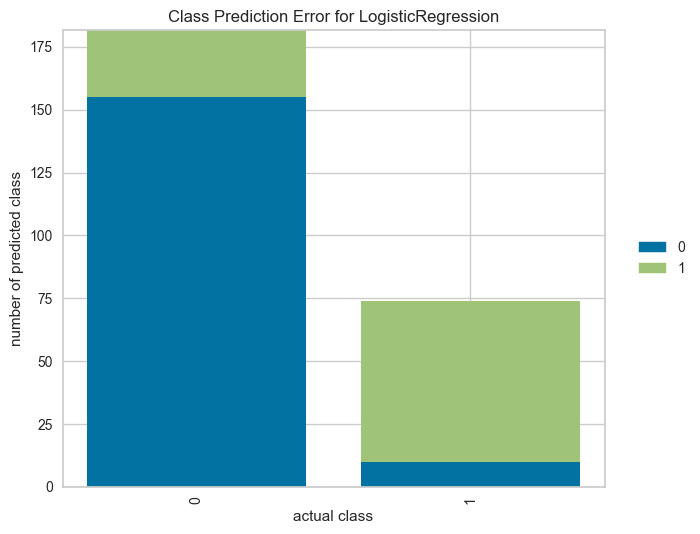

In [49]:
# Visualize Predictions: PyCaret juga memungkinkan visualisasi distribusi prediksi atau perbandingan antara nilai aktual dan prediksi.
plot_model(tuned_lr_model, plot='error')

Error Prediksi Kelas untuk Regresi Logistik
Apa yang Ditampilkan:

Grafik batang ini memberikan ringkasan visual dari error prediksi (yaitu, jumlah prediksi yang salah) untuk setiap kelas.
Batang biru mewakili jumlah prediksi yang benar untuk setiap kelas.
Batang hijau mewakili prediksi yang salah untuk setiap kelas.
Interpretasi:

Kelas 0 (tidak selamat) memiliki lebih sedikit kesalahan prediksi dibandingkan dengan Kelas 1 (selamat), menunjukkan bahwa model lebih akurat dalam memprediksi ketidakselamatan daripada keselamatan.

Mengapa Plot Error Prediksi Penting?
Plot ini penting karena memberitahu kita:

Kesalahan yang Sering Terjadi: Bar hijau yang tinggi menunjukkan bahwa banyak dari Anda yang sering salah menebak jumlah kelereng hijau. Ini seperti mengatakan bahwa bagian ini lebih sulit.
Keakuratan Tebakan: Bar biru yang tinggi menunjukkan bahwa banyak dari Anda yang sering benar menebak jumlah kelereng biru. Ini bagus karena berarti sebagian besar dari Anda mengerti dan menebak dengan baik.
Contoh Sederhana dari Plot Error Prediksi:
Misalkan di kelas ada 20 siswa, dan guru menunjukkan hasil sebagai berikut:

15 siswa benar menebak kelereng biru: Jadi, bar biru akan tinggi, mencapai angka 15.
10 siswa salah menebak kelereng hijau: Jadi, bar hijau juga akan tinggi, mencapai angka 10.
Bagaimana Menggambarkan Plot Error Prediksi?
Dalam grafik, Anda akan melihat dua bar berbeda warna:

Bar Biru (Benar): Ini menunjukkan berapa banyak tebakan yang benar.
Bar Hijau (Salah): Ini menunjukkan berapa banyak kesalahan atau tebakan yang salah.
Grafik ini sangat membantu karena:

Menunjukkan Kekuatan dan Kelemahan: Kita bisa melihat di mana kita baik (banyak tebakan benar) dan di mana kita perlu perbaikan (banyak kesalahan).
Membantu Guru Mengajar Lebih Baik: Guru bisa melihat apa yang perlu dijelaskan lagi atau diajarkan dengan cara yang berbeda.
Kesimpulan:
Plot error prediksi seperti buku rapor untuk tebakan kita. Ia menunjukkan di mana kita sering melakukan kesalahan dan di mana kita sering benar, membantu kita belajar dan menjadi lebih baik dalam menebak atau memprediksi sesuatu. Ini sangat berguna dalam belajar karena kita bisa melihat secara langsung hasil dari apa yang kita pelajari atau tebak.

Hubungan dengan Kejadian Nyata dan Kesimpulan
Dalam konteks dataset Titanic:

Kekuatan Model: Model cukup baik dalam memprediksi non-survivor, seperti ditunjukkan oleh jumlah error prediksi yang lebih rendah untuk Kelas 0 dan banyaknya Negatif Benar.
Kelemahan Model: Model lebih kesulitan dalam memprediksi survivor (Kelas 1), seperti terlihat dari jumlah Negatif Palsu yang lebih tinggi dan error prediksi yang signifikan.
Kasus Penggunaan: Model ini berguna dalam skenario di mana biaya dari Negatif Palsu (misalnya, gagal mengidentifikasi survivor) tidak terlalu tinggi. Namun, perlu ada perbaikan untuk skenario di mana identifikasi survivor sangat penting.
Perbaikan Potensial:

Rekayasa Fitur: Analisis lebih lanjut bisa dilakukan pada pentingnya fitur dan interaksi untuk meningkatkan model.
Penyetelan Model: Menyesuaikan ambang klasifikasi dan menjelajahi konfigurasi regresi logistik yang berbeda atau model alternatif juga bisa meningkatkan performa.
Dengan memahami setiap aspek dari performa model melalui visualisasi ini, Anda dapat lebih baik menyesuaikan model Anda untuk memenuhi kebutuhan spesifik atau mengatasi kelemahannya.

In [10]:
from pycaret.classification import save_model

# Misalkan 'tuned_lr_model' adalah model yang ingin Anda simpan
save_model(tuned_lr_model, 'model_tuned_lr')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['PassengerId', 'Pclass', 'Age',
                                              'SibSp', 'Parch', 'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None...
                                                               handle_unknown='value',
                                            

In [5]:
from pycaret.classification import load_model

# Memuat model yang telah disimpan
loaded_model = load_model('model_tuned_lr')


Transformation Pipeline and Model Successfully Loaded


In [16]:
#load data baru
data_test=pd.read_csv('test.csv')

In [4]:
# Misalkan 'new_data' adalah DataFrame baru yang ingin Anda prediksi
from pycaret.classification import predict_model

# Membuat prediksi
predictions = predict_model(loaded_model, data=data_test)
print(predictions)


NameError: name 'loaded_model' is not defined

In [23]:
predictions['prediction_label'].value_counts()

prediction_label
0    298
1    120
Name: count, dtype: int64